In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# CMP 3002 
## Analyzing algorithms

### Housekeeping

- Install Git, Anaconda and Slack
- Extra points: https://www.octogatosconf.com/
    - 5 points for people that submit a summary about the talks they attended

## Review

program -> algorithm

language -> pseudocode

computer -> model of computation

### Random access machine (RAM) 

![plot](../images/ram.png)

It allows us to compare algorithms on a performance basis.

Each operation takes 1 time steps (write or read)
Needs to know where the words are to access them
A word is an x number of bits

### Pointer machine

- Simple version of object oriented programming 
- Dynamically allocated objects (create and destroy)
- Objects have a constant number of fields
- Field is either a word or a pointer
- Pointer either points to an object or is null (none in Python)
- Adding values takes 1 time steps
- Following a pointer takes 1 time steps

## Runtime

- The number of times that a discrete operation needs to performed in order to get a computation done.
- Applications:
    - performance prediction
    - compare performance
    - provide guarantees
    - avoid performance bugs - a lot of performance issues are caused because programmers don't understand the performance characteristics of their own code 

### Scientific method

- **Observe:** running time or memory
- **Hypothesize:** model consistent with the observations
- **Predict:** based on hypothesis
- **Verify:** using experiments
- **Validate:** repeat until the hypothesis and observations agree

** experiments should be reproducible

** experiments should be able to show hypothesis are wrong

### Example
- Write a function that takes calculates the sum of numbers from 1 to *n*, where *n* is the input

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```

### Observations

- how do we time our code?
    - manually using a watch
    - use Python timer

In [17]:
def sum1_time(n):
    start = 1000000*time.time()
    total = 0
    for i in range(1,n+1):
        total += i
    return 1000000*time.time() - start

# Implement this using Python decorators

# 2.1 GHz = 2.1 x 10^9

# | 1 | 2 |   3-4   |

In [20]:
N = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
run_time = [sum1_time(n) for n in N]

In [28]:
df = pd.DataFrame(zip(N, run_time))

df.columns = ['N', 'T(N)']

In [29]:
df

,N,T(N)
0,1,2.00
1,10,1.00
2,100,4.75
3,1000,51.25
4,10000,521.75
5,100000,6520.75
6,1000000,58549.00
7,10000000,429071.00


### Hypothesis

Based on the observations, what would be a good function that describes the runtime?

<AxesSubplot:xlabel='N'>

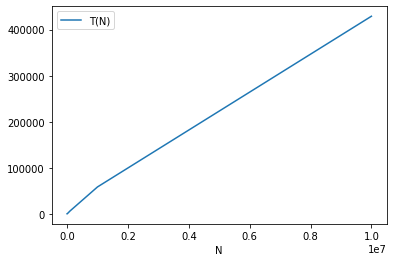

In [31]:
df.plot(x='N', y='T(N)')

### Hypothesis

The growth of the runtime seems to follow a linear function of the type:

> $T(n) = a \times n + b$

- $b$ is not difficult to estimate (why?)

> $b = 0$

- in the case of $a$ we use our observations 

> $10000 \times a = 521.75$

> $a = 0.052$

> $T(n) = 0.052n$

### Predict

For very large values of $n$:

> $n = 10^{12}$

> $T(n) = 52 \times 10^9$ us

> $T(n) = 52000$ seconds

> $T(n) = 14.4$ hours

### Verify

Use experiments to verify the predictions

- Will the prediction hold in any case?
- What factors will affect our experiments?
    - hardware
    - software running
    - operating system
    - language used
- It's difficult to get precise measurements

### Validate

Repeat this methodology until we get to the right function

## Math models

Total runtime can be defined as the sum of the cost of the basic operations of the programs multiply by their frequency


### Example 

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```


|Operation|Cost|Frequency|
|---------|----|---------|
| var declaration | $c_1$ | 2 |
| array access | $c_2$ | $n$ |
| increment | $c_3$ | $n$ |

> $T(n) = 2c_1 + (c_2 + c_3)n$

### Math models

- What are the issues of counting the frequency of each operation in our code?
- Are full details really necessary?
- How do we simplify this?


### Simplify calculation

1. Just count the most expensive ones
    - or the one executed the most frequently
2. Estimate the runtime as a function of $n$
    - ignore lower order terms
    - the limit to infinity is 1
    
> $T(n) = 2c_1 + (c_2 + c_3)n$

> $T(n) \approx (c_2 + c_3)n$
 

## Insertion sort

- Input: A sequence of $n$ numbers $(a_1, a_2, \dots, a_n)$
- Output: A permutation $(a'_1, a'_2, \dots, a'_n)$ of the input sequence such that $a'_1 \leq a'_2 \leq \dots \leq a'_n$

**The idea is to sort the same way we would sort a hand of cards**

### Example

![plot](../images/insertion_sort_example.png)

![plot](../images/insertion_sort.png)

### Analysis
![plot](../images/insertion_sort_analysis.png)

$t_1 + t_2 + ... + t_{n-1}$

### Total time

> $T(n) = c_1n + c_2(n-1) + c_4(n-1) + c_5 \sum_{j=2}^n t_j + c_6 \sum_{j=2}^n (t_j-1) + c_7 \sum_{j=2}^n (t_j-1) + c_8(n-1)$

**Even for inputs of the same size, the running time might depend on the type of input** 

### Best case:
- The input is sorted, that is $a_1 \leq a_2 \leq \dots \leq a_n$
- $t_j = 1, \forall j$


> $T(n) = c_1n + c_2(n-1) + c_4(n-1) + c_5 (n-1) + c_8(n-1)$

> $T(n) = (c_1 + c_2 + c_4 + c_5 + c_8)n - (c_2 + c_4 + c_5 + c_8)$

Note that:

> $T(n) = an + b$

> $a = c_1 + c_2 + c_4 + c_5 + c_8$

> $b = -(c_2 + c_4 + c_5 + c_8)$

So $T(n)$ is a **linear function**

### Worst case:
- The input is sorted in reverse, that is $a_1 \geq a_2 \geq \dots \geq a_n$

> $t_j = j, \forall j$

> $\sum_{j=2}^n j = \frac{n(n-1)}{2} - 1$

> $\sum_{j=2}^n (j-1) = \frac{n(n-1)}{2}$


> $T(n) = c_1n + c_2(n-1) + c_4(n-1) + c_5 (\frac{n(n-1)}{2} - 1) + c_6 (\frac{n(n-1)}{2}) + c_7 (\frac{n(n-1)}{2}) + c_8(n-1)$

> $T(n) = (\frac{c_5}{2} + \frac{c_6}{2} + \frac{c_7}{2})n^2 + (c_1 + c_2 + c_4 + \frac{c_5}{2} - \frac{c_6}{2} - \frac{c_7}{2} + c_8)n - (c_2 + c_4 + c_5 + c_8)$

Note that:

> $T(n) = an^2 + bn + c$

> $a = \frac{c_5}{2} + \frac{c_6}{2} + \frac{c_7}{2}$

> $b = c_1 + c_2 + c_4 + \frac{c_5}{2} - \frac{c_6}{2} - \frac{c_7}{2} + c_8$

> $c = -(c_2 + c_4 + c_5 + c_8)$

So $T(n)$ is a **quadratic function**

### Runtime

> $(c_1 + c_2 + c_4 + c_5 + c_8)n - (c_2 + c_4 + c_5 + c_8) \leq T(n) \leq (\frac{c_5}{2} + \frac{c_6}{2} + \frac{c_7}{2})n^2 + (c_1 + c_2 + c_4 + \frac{c_5}{2} - \frac{c_6}{2} - \frac{c_7}{2} + c_8)n - (c_2 + c_4 + c_5 + c_8)$


### Simplifying

> $(c_1 + c_2 + c_4 + c_5 + c_8)n \leq T(n) \leq (\frac{c_5}{2} + \frac{c_6}{2} + \frac{c_7}{2})n^2$

## Asymptotic notation

- Domain is the natural numbers $\{0, 1, 2, \dots\}$
- Describe the worst-case of $T(n)$

### $\Theta-notation$

> $\Theta(g(n)) = \{f(n) : \exists c_1, c_2, n_0 > 0, \text{such that } 0 \leq c_1g(n) \leq f(n) \leq c_2g(n), \forall n \geq n_0 \}$

- tight bound
- we need two constants that represent an upper bound and a lower bound
- Example: for loop to calculate sum of 1 to n is $\Theta(n)$


### $O-notation$

> $O(g(n)) = \{f(n) : \exists c, n_0 > 0 \text{ such that } 0 \leq f(n) \leq cg(n), \forall n \geq n_0 \}$

- upper bound
- Example: insertion sort is $O(n^2)$

### $\Omega-notation$

> $\Omega(g(n)) = \{f(n) : \exists c, n_0 > 0 \text{ such that } 0 \leq cg(n) \leq f(n), \forall n \geq n_0 \}$

- lower bound
- Example: insertion sort is $\Omega(n)$

## Types of analyses

1. **Best case:** lower bound on cost, based on $\Omega$ notation
    - easiest input
    - provides a goal for all inputs
    
2. **Worst case:** upper bound on cost, based on $O$ notation
    - most difficult input
    - provides a guarantee for all inputs
    
3. **Average case:** expected cost for a random input
    - need to model for a random input
    - provides a way to predict performance

### How do we design our programs?

When designing software, we need to consider the customer needs in our solutions

1. Design for the worst case (most common)
    - We can provide a performance guarantee for our customers
2. Randomize and depend on a probabilistic guarantee
    - This requires a good understanding of the users of the program
    
** Although is the standard, focusing on the worst case might not be the best approach

## Important functions

In [75]:
r = pd.DataFrame()
r['n'] = np.arange(1,100,10)
r['n1'] = np.arange(1,100,10)

In [77]:
r['log(n)'] = np.log2(r['n'])
r['sqrt(n)'] = np.sqrt(r['n'])
r['nlog(n)'] = r['n'] * r['log(n)']
r['n^2'] = np.power(r['n'],2)
r['n^3'] = np.power(r['n'],3)
r['2^n'] = np.power(2*np.ones(r.shape[0]),r['n'])


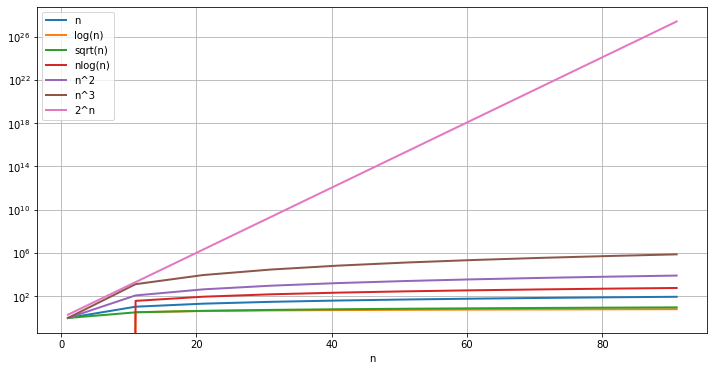

In [93]:
r.plot(x='n1',logy=True, lw=2, figsize=(12,6))
plt.xlabel('n')
plt.grid()


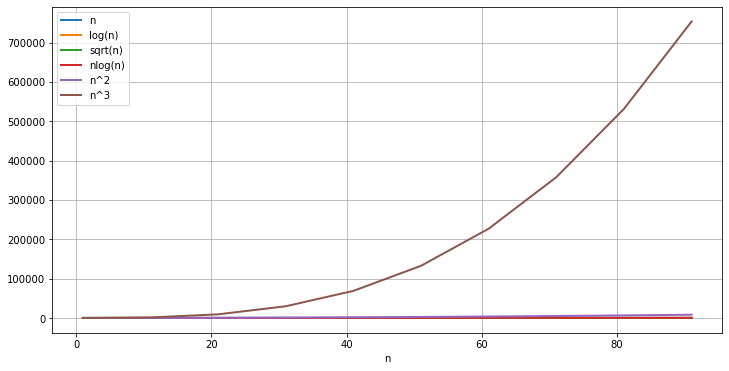

In [79]:
r[['n1','n', 'log(n)', 'sqrt(n)', 'nlog(n)', 'n^2', 'n^3']].plot(x='n1', lw=2, figsize=(12,6))
plt.xlabel('n')
plt.grid()

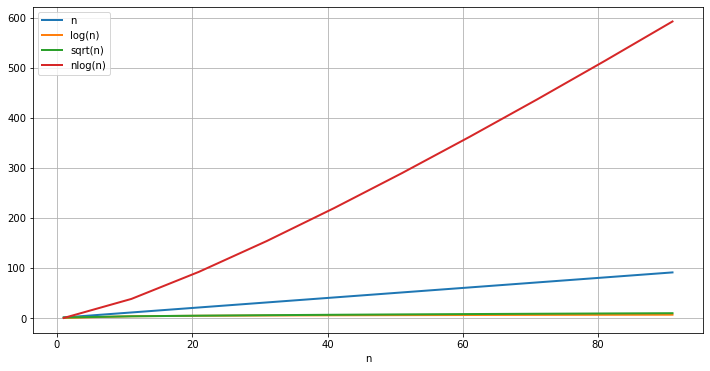

In [82]:
r[['n1','n', 'log(n)', 'sqrt(n)', 'nlog(n)']].plot(x='n1', lw=2, figsize=(12,6))
plt.xlabel('n')
plt.grid()

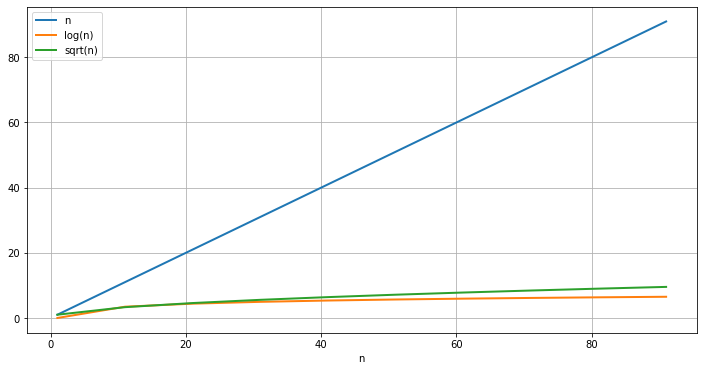

In [84]:
r[['n1','n', 'log(n)', 'sqrt(n)']].plot(x='n1', lw=2, figsize=(12,6))
plt.xlabel('n')
plt.grid()

## Memory

|type|bytes|
|----|-----|
|boolean|1|
|char|2|
|int|4|
|float|4|
|long|8|
|double|8|

### Common memory usage

- one-dimensional arrays (size $N$)

> $N \times bytes_{N}$

- two-dimensional arrays (size $N \times M$)

> $N \times M \times bytes_{N/M}$

- for structures or classes that use pointers

> $8 bytes$

- there is going to be overhead for objects depending on the language


### Calculating memory complexity

- Rarely memory grows the same way runtime does
    - If so, a memory leak might be present
- Easier to just add up the total memory of the variables and objects being used


```
# Example memory leak
int A [3];
A = [1,2,3];

int c = 5;
int B [c];


int c = 5*4;
for (int i=1; i < 10; i++){
int B *[] = malloc(i*8);
}

8 + 16 + 24 + ...
 i(i+2)/2
```